# Homework 3

Data Analytics | UC Berkeley Haas School of Business

For this assignment, we'll be using Diamonds_sample.csv again. 

## Question 1: Data Prep
Load any necessary packages to fit classification trees (see Lab 3)  

In [3]:
# Load required packages
library(dplyr)
library(ggplot2)
library(repr)
library(rpart) # For tree functions
library(randomForest) # For Random Forest

Load in the data. Drop the GEM_ID variable and print the first rows.

In [31]:
# Load data
dataSet<- read.csv('Diamonds_sample.csv', header = TRUE, stringsAsFactors = TRUE)
# Drop GEM_ID
variables = c("carat", "clarity", "high_color", "cut", "cost")
dataSet = dataSet[variables]
# Print rows
head(dataSet)
summary(dataSet)

,carat,clarity,high_color,cut,cost
,<dbl>,<int>,<int>,<int>,<dbl>
1,0.2746253,1,1,1,3468.159
2,0.4699232,1,1,1,4814.552
3,0.6673995,1,1,1,6473.046
4,0.4628467,1,1,1,2992.616
5,0.5830976,1,0,1,5471.689
6,0.4277917,1,1,1,3999.953


     carat            clarity         high_color          cut        
 Min.   :0.03988   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.25546   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.36372   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.37141   Mean   :0.7366   Mean   :0.6188   Mean   :0.7109  
 3rd Qu.:0.48627   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :0.88796   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      cost      
 Min.   :-1473  
 1st Qu.: 2184  
 Median : 3229  
 Mean   : 3266  
 3rd Qu.: 4295  
 Max.   : 8556  

Split the data evenly (50/50) into training and test data. Set the seed to 1 before you split and follow the code we used in lab in order to get the correct solutions. 

**Important:** Set the seed to 1

In [5]:
# Set a seed for reproducibility
set.seed(1)

# Create train and test sets (50% for training, 50% for testing)
train_rows <- sample(1:nrow(dataSet), nrow(dataSet)/2)
train <- dataSet[train_rows,]
test <- dataSet[-train_rows,]



## Question 2: Fully Grown Tree

Create a simple classification tree on the training data using the training data to predict whether the diamond is a high value color or not (``high_color``). Grow this tree without any pruning or depth parameters: in your controls set `` cp=0, minsplit=2, minbucket=1``. Display the confusion matrix and calculate the mean squared error in the testing data. 

In [20]:
# Simple classification tree training data using all of the variables
simple_tree <- rpart(as.factor(high_color)~., train, method="class", 
                   control=rpart.control(cp=0, minsplit=2, minbucket=1))
# Fit model to test data
pred <- predict(simple_tree, test, type="class")
test$pred <- ifelse(pred==1, 1, 0)
# Calculate MSE
mean((test$pred-test$high_color)^2)
# Display the "confusion" table where we have the predicted values vs. actual values
confusion <- table(test$pred, test$high_color)
confusion

[1] 0.0982906

   
      0   1
  0  73  11
  1  12 138

Plot the unpruned tree. To make the plot area big enough to read the tree use this command before the plotting command: ``options(repr.plot.width=10, repr.plot.height=15)``

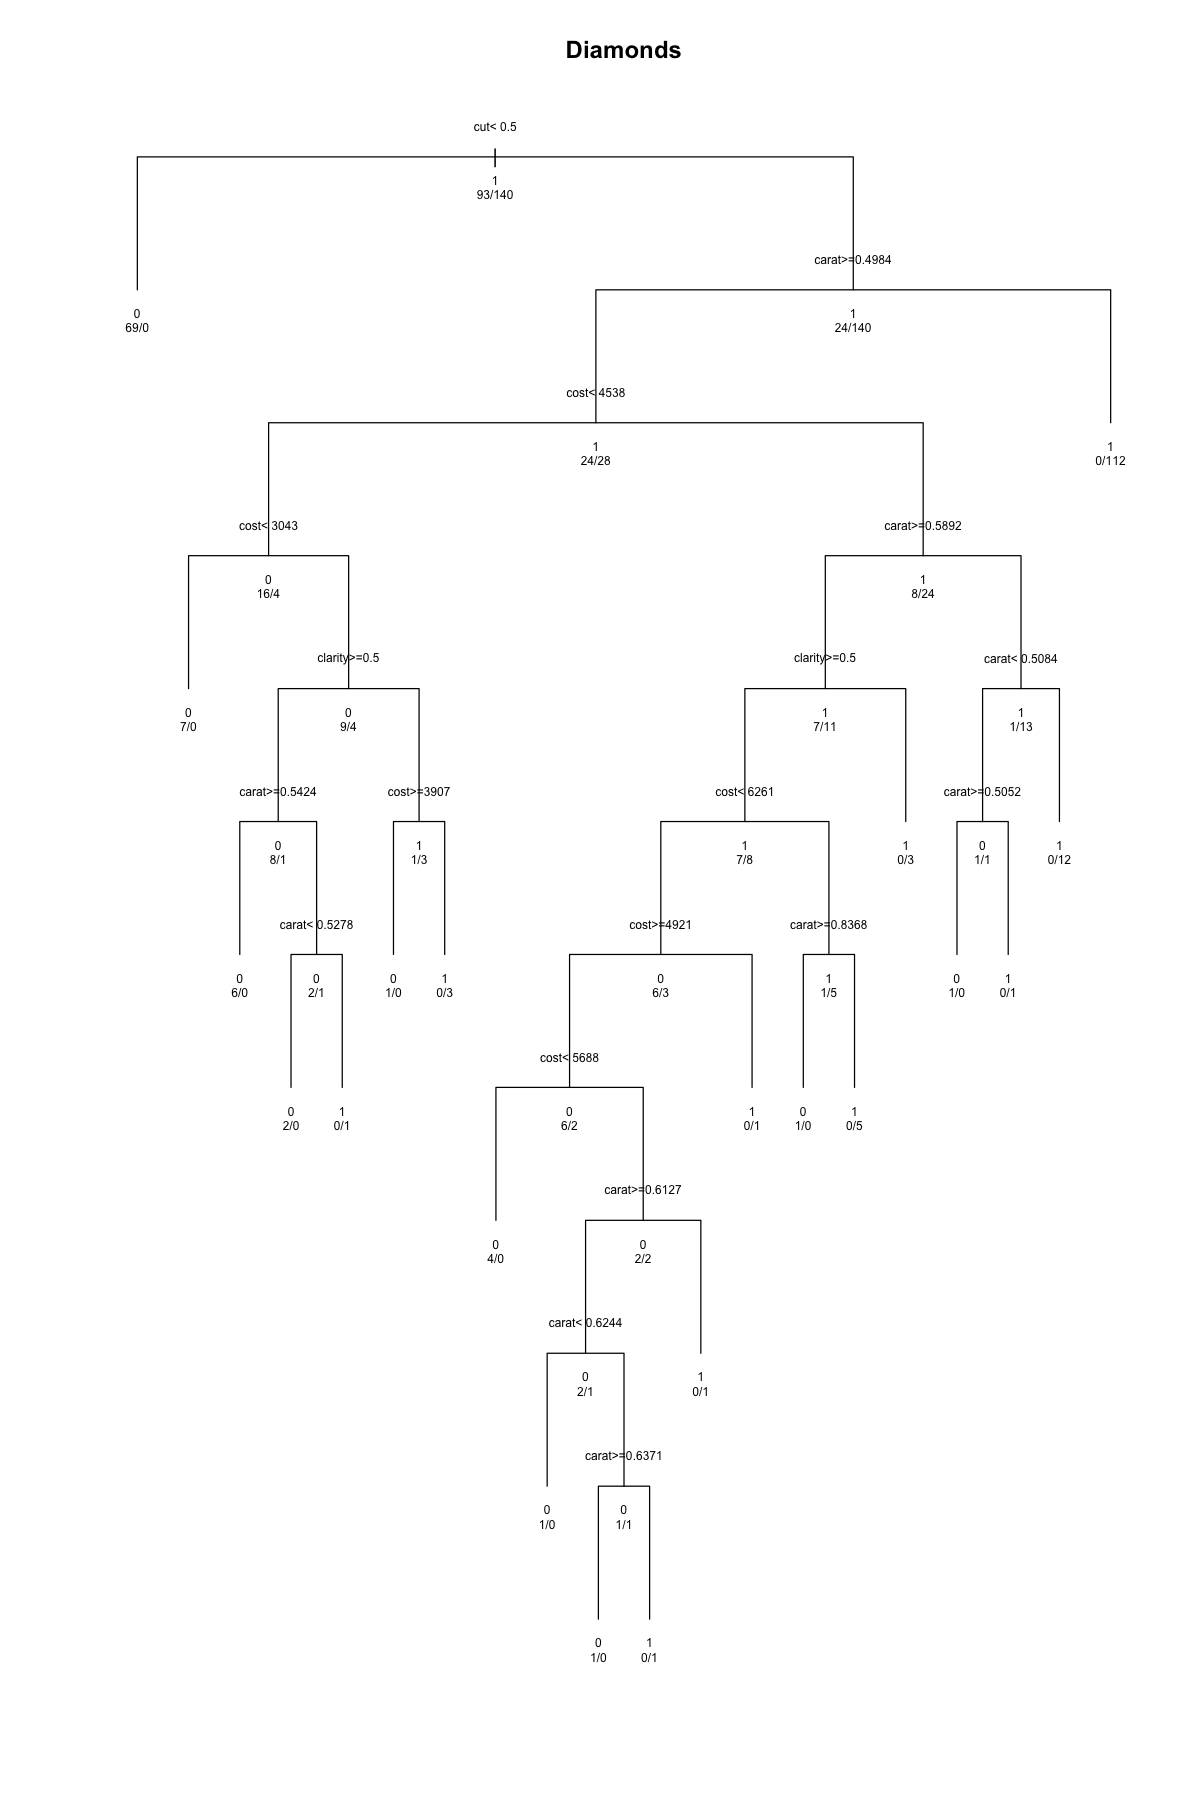

In [21]:
# Plotting options
options(repr.plot.width=10, repr.plot.height=15)

# Plot the tree
plot(simple_tree, uniform=TRUE, main="Diamonds") # plot tree
text(simple_tree, use.n=TRUE, all=TRUE, cex=0.6) # add labels to tree

## Question 3: Pruned Tree

Now, lets prune our tree a bit in hopes of getting better out of sample prediction. Create a new tree with the pruning parameter ``cp=0.05`` (leave the ``minsplit`` and ``minbucket`` parameters as the last tree). Display the confusion matrix and calculate its MSE in the test data. 

In [26]:
# Simple classification tree training data using all of the variables
pruned_tree <- rpart(as.factor(high_color)~., train, method="class", 
                   control=rpart.control(cp=0.05, minsplit=2, minbucket=1))
# Fit model to test data
pred_prune <- predict(pruned_tree, test, type="class")
test$pred_prune <- ifelse(pred_prune==1, 1, 0)
# Calculate MSE
mean((test$pred_prune-test$high_color)^2)
# Display the "confusion" table where we have the predicted values vs. actual values
confusion <- table(test$pred_prune, test$high_color)
confusion

[1] 0.08974359

   
      0   1
  0  74  10
  1  11 139

Plot your pruned tree.

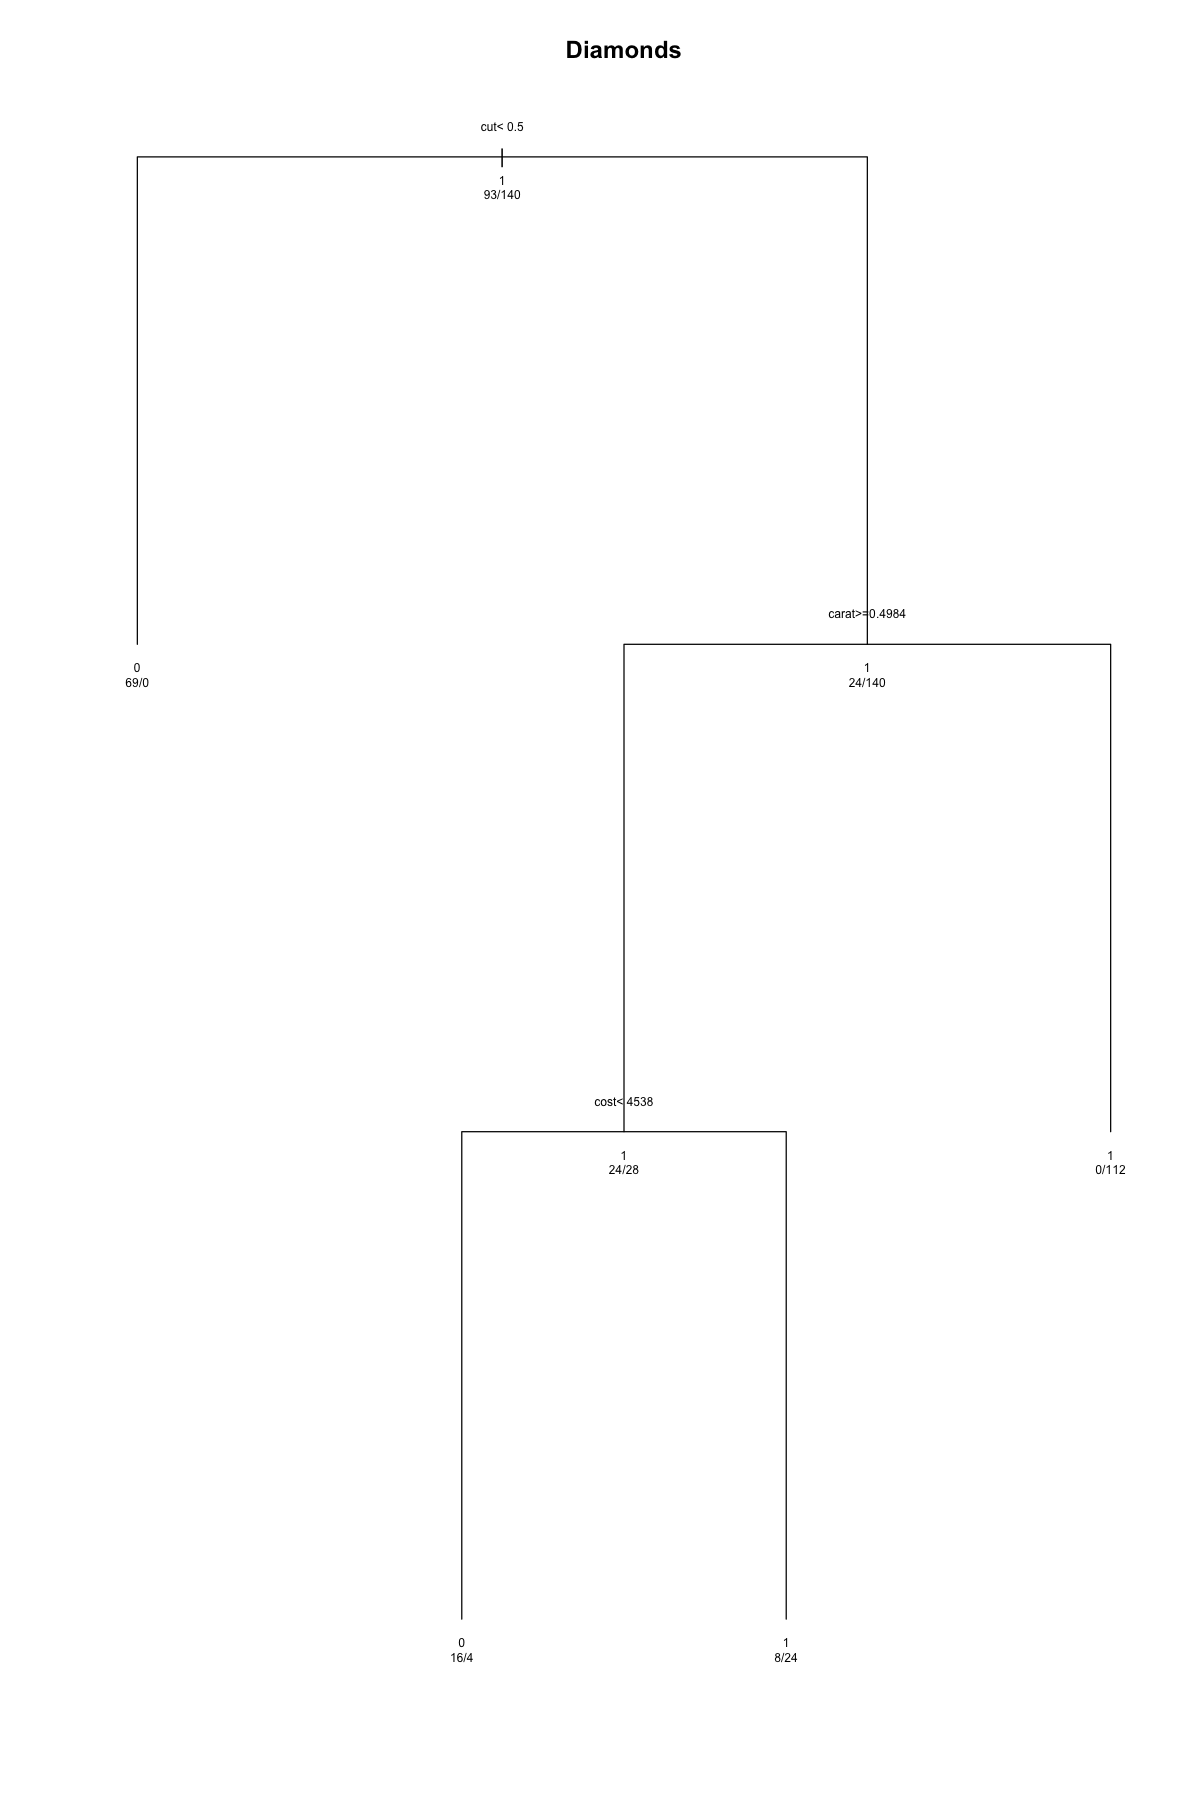

In [28]:
# Plotting options
options(repr.plot.width=10, repr.plot.height=15)

# Plot the tree
plot(pruned_tree, uniform=TRUE, main="Diamonds") # plot tree
text(pruned_tree, use.n=TRUE, all=TRUE, cex=0.6) # add labels to tree

## Question 4: Random Forest
Now, we'll use a random forest model to predict the diamond color.



Run a random forest model on the training data. Set the seed to 1 and set your pruning parameters to number of trees at 500, minimum terminal node size to 1, and the number of variables sampled at each split to 2 (``ntree = 500 , nodesize = 1, mtry = 2``). 

**Important:** Set the seed to 1

In [18]:
# Set seed  for replicating results as there's a lot of randomization that happens in Random Forests
set.seed(1)
# Fit the training data using a Random Forest model
rf <- randomForest(as.factor(high_color)~., data=train, mtry=2, nodesize=1, ntree=500)

# Predict outcomes on the test data
pred_rf <- predict(rf, newdata=test)

# Calculate MSE
test$pred_rf <- ifelse(pred_rf==1, 1, 0)
mean((test$pred_rf-test$high_color)^2)

[1] 0.08119658

Use your model to predict test dataset outcomes. Compare the predicted and actual outcomes in a confusion matrix.  Calculate the error rate.

In [32]:
# Display confusion matrix
confusion_rf <- table(pred_rf, test$high_color)
confusion_rf

       
pred_rf   0   1
      0  74   8
      1  11 141